T-statistic: 16.506195103371727
P-value: 2.2357479469380978e-57
Mean Engagement Rate (Light): 0.5674938403010842
Mean Engagement Rate (Dark): 0.4392986783885559
Відкидаємо нульову гіпотезу: є статистично значуща різниця.


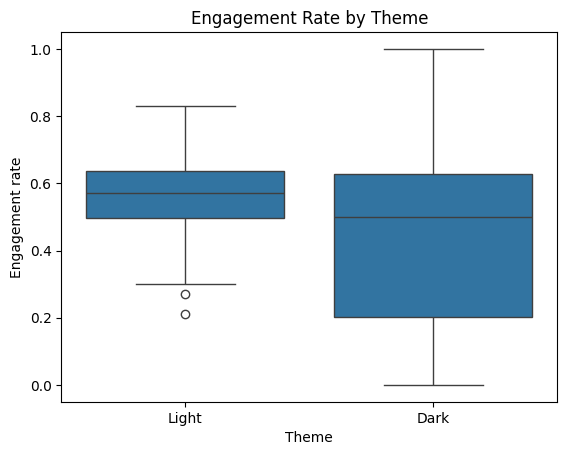

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data-export.csv")

df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)

numeric_columns = [
    'Users', 'Sessions', 'Engaged sessions',
    'Average engagement time per session', 'Engaged sessions per user',
    'Events per session', 'Engagement rate', 'Event count'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

half_index = len(df) // 2
df['Theme'] = ['Light'] * half_index + ['Dark'] * (len(df) - half_index)


light = df[df['Theme'] == 'Light']['Engagement rate'].dropna()
dark = df[df['Theme'] == 'Dark']['Engagement rate'].dropna()


t_stat, p_value = ttest_ind(light, dark, equal_var=False)


mean_light = light.mean()
mean_dark = dark.mean()


print("T-statistic:", t_stat)
print("P-value:", p_value)
print("Mean Engagement Rate (Light):", mean_light)
print("Mean Engagement Rate (Dark):", mean_dark)


alpha = 0.05
if p_value < alpha:
    print("Відкидаємо нульову гіпотезу: є статистично значуща різниця.")
else:
    print("Немає підстав відкидати нульову гіпотезу: різниця незначуща.")

sns.boxplot(data=df, x='Theme', y='Engagement rate')
plt.title("Engagement Rate by Theme")
plt.show()


First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Descriptive Statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        N

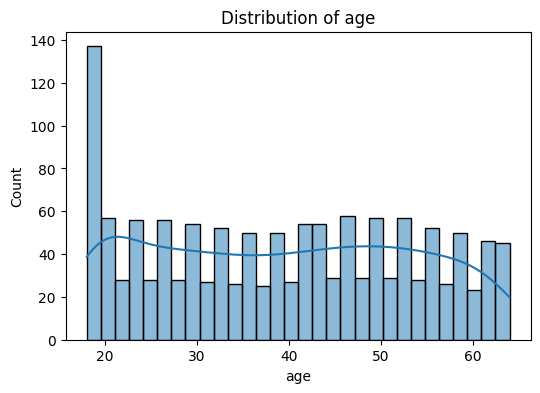

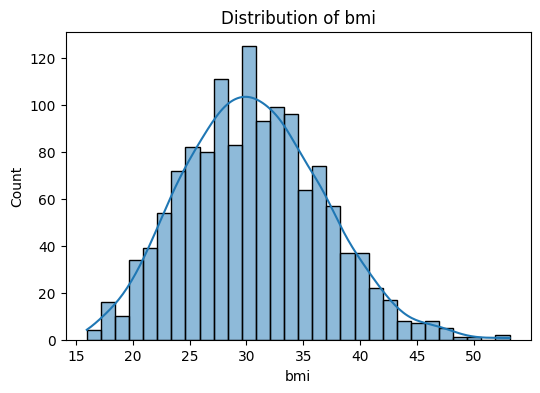

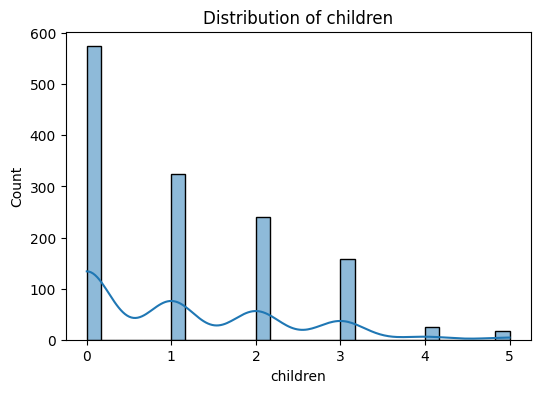

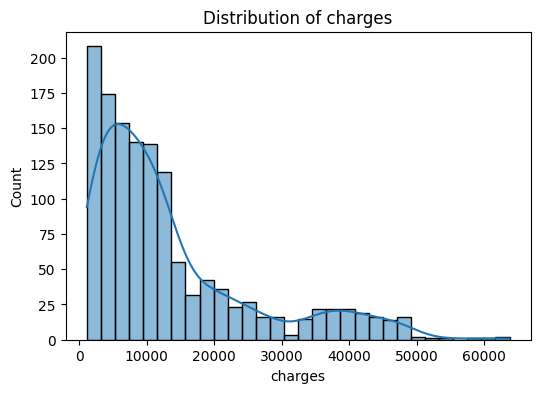

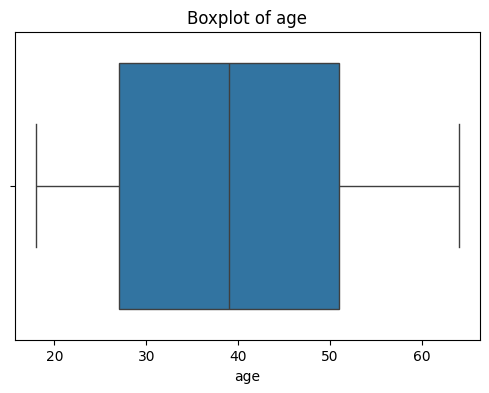

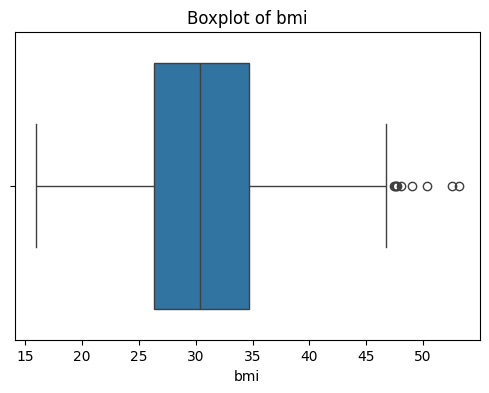

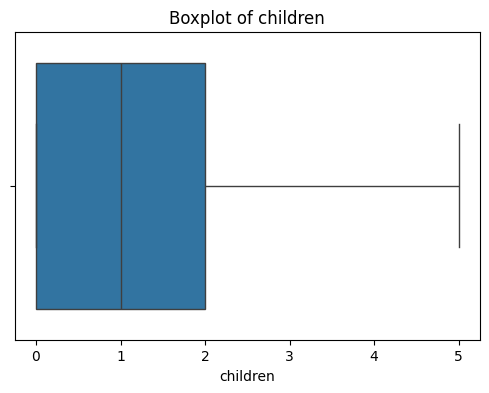

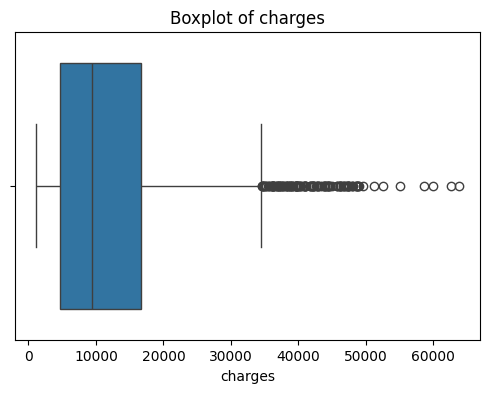

Found 139 outliers in 'charges'

Discussion:
'charges' має велику кількість викидів, ймовірно через високі медичні витрати пацієнтів із хронічними хворобами.
'bmi' також містить деякі викиди (> 45), що може свідчити про ожиріння.
Інші змінні мають відносно нормальні розподіли.
Додано колонку 'is_outlier_charges'. Кількість позначених викидів: 139


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')

print("First 5 rows:")
print(df.head())

print("Descriptive Statistics:")
print(df.describe(include='all'))

print("Missing Values:")
print(df.isnull().sum())

numeric_cols = ['age', 'bmi', 'children', 'charges']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

charges_outliers = detect_outliers_iqr(df, 'charges')
print(f"Found {len(charges_outliers)} outliers in 'charges'")

print("\nDiscussion:")
print("'charges' має велику кількість викидів, ймовірно через високі медичні витрати пацієнтів із хронічними хворобами.")
print("'bmi' також містить деякі викиди (> 45), що може свідчити про ожиріння.")
print("Інші змінні мають відносно нормальні розподіли.")

df['is_outlier_charges'] = df['charges'].isin(charges_outliers['charges'])

print("Додано колонку 'is_outlier_charges'. Кількість позначених викидів:", df['is_outlier_charges'].sum())



First 5 rows:
   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2        

C:\Users\Oleg\AppData\Local\Temp\ipykernel_18576\4153123754.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df.dropna(inplace=True)
C:\Users\Oleg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


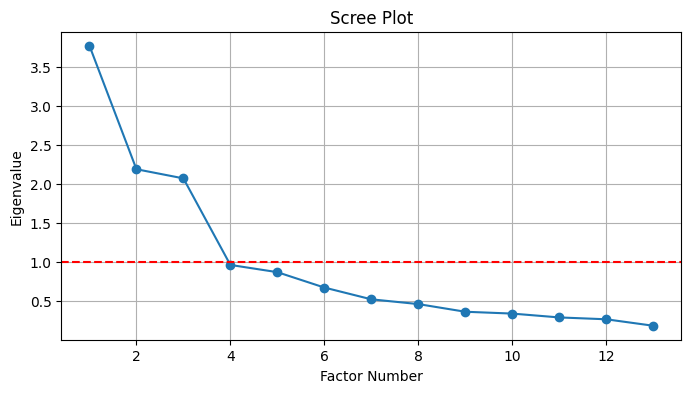


Factor Loadings (Varimax):
                                   Factor 1  Factor 2  Factor 3  Factor 4
Inflight wifi service                  0.13      0.10      0.79      0.07
Departure/Arrival time convenient     -0.05      0.05      0.43      0.01
Ease of Online booking                -0.00      0.01      0.93      0.00
Food and drink                         0.77     -0.00      0.02     -0.02
Online boarding                        0.33      0.05      0.43      0.43
Seat comfort                           0.77      0.03      0.02      0.32
Inflight entertainment                 0.83      0.48      0.05     -0.12
On-board service                       0.08      0.69      0.04      0.14
Leg room service                       0.07      0.48      0.10      0.06
Baggage handling                       0.04      0.76      0.04      0.07
Checkin service                        0.08      0.26      0.00      0.40
Inflight service                       0.04      0.80      0.03      0.04
Cleanlines

C:\Users\Oleg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("test.csv")

print("First 5 rows:")
print(df.head())

survey_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

survey_df = df[survey_cols]

print("Missing values:")
print(survey_df.isnull().sum())

survey_df.dropna(inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(survey_df)

kmo_all, kmo_model = calculate_kmo(scaled_data)
bartlett_test, p_value = calculate_bartlett_sphericity(scaled_data)
print(f"\nKMO Measure: {kmo_model:.2f}")
print(f"Bartlett's test p-value: {p_value:.5f}")

fa = FactorAnalyzer(rotation=None)
fa.fit(scaled_data)
eigenvalues, _ = fa.get_eigenvalues()

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

n_factors = 4

fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(scaled_data)
loadings = pd.DataFrame(fa.loadings_, index=survey_cols, columns=[f'Factor {i+1}' for i in range(n_factors)])

print("\nFactor Loadings (Varimax):")
print(loadings.round(2))

for i in range(n_factors):
    print(f"\nFactor {i+1} top items:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(5))
